# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv('C:/Users/diana/Documents/Repos/GitHub/supervised-learning-classification/data/website.csv')
websites

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,16,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,3,186,0,0,0.0,1
1777,M4_41,198,17,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,2,124,0,0,0.0,1
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,15/02/1999 0:00,15/07/2015 0:00,...,2,6,6631,87,89,132181,6945,87,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,NaN,US,CA,1/04/1998 0:00,9/12/2016 0:00,...,0,0,0,0,0,0,0,0,0.0,0


#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [3]:
# Identify the columns containing features of the websites
features = websites.columns[:-1]
print("Features of the websites:", features)

Features of the websites: Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES'],
      dtype='object')


In [4]:
# Your code here
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1475 non-null   object 
 7   WHOIS_STATEPRO             1419 non-null   object 
 8   WHOIS_REGDATE              1654 non-null   object 
 9   WHOIS_UPDATED_DATE         1642 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [5]:
websites.describe()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781.000000,1781.000000,969.000000,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
mean,56.961258,11.111735,11726.927761,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,27.555586,4.549896,36391.809051,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,1853.000000,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,68.000000,13.000000,11323.000000,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000
max,249.000000,43.000000,649263.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,1198.000000,20.000000,1.000000


In [6]:
# Checking unique values for categorical columns
categorical_columns = ['CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO']

unique_values = {}
for col in categorical_columns:
    unique_values[col] = websites[col].nunique()

unique_values

{'CHARSET': 8, 'SERVER': 238, 'WHOIS_COUNTRY': 48, 'WHOIS_STATEPRO': 181}

In [7]:
# Your comment here

#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

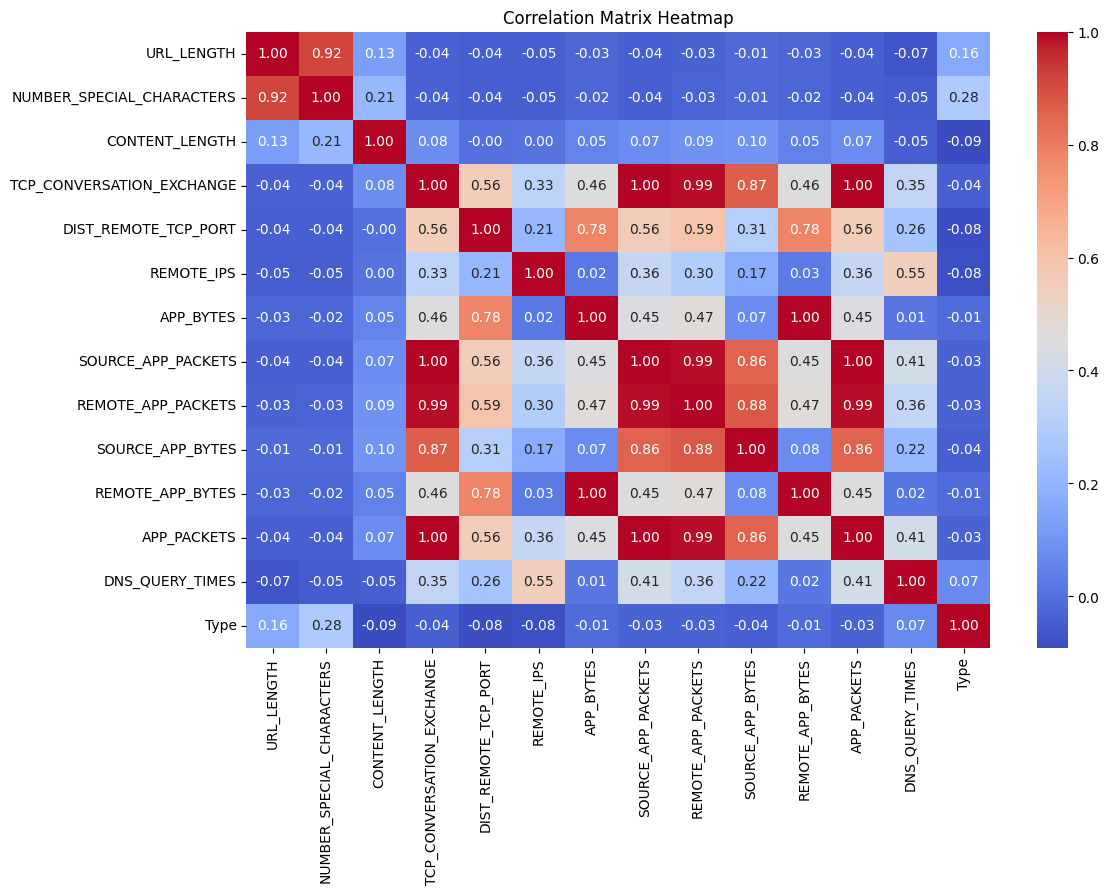

In [8]:
# Select numeric columns
numeric_columns = websites.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix using only numeric columns
correlation_matrix = websites[numeric_columns].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()





In [9]:
# Your comment here

# URL_LENGTH and NUMBER_SPECIAL_CHARACTERS: These two columns have a very strong positive correlation of 0.92, indicating that they contain similar information.
# Considering their high correlation, we might consider removing one of these columns to avoid redundancy.

# TCP_CONVERSATION_EXCHANGE and SOURCE_APP_PACKETS: These two columns have a very strong positive correlation of 0.998, suggesting that they provide almost identical information.
# Removing one of these columns could help reduce multicollinearity in the dataset.

# APP_PACKETS and SOURCE_APP_PACKETS: Similarly, these two columns have a strong positive correlation of 0.998, indicating redundancy in the information they provide.
# Removing one of these columns could help simplify the model and reduce multicollinearity.

# APP_BYTES and SOURCE_APP_BYTES: These two columns also have a strong positive correlation of 0.999, suggesting redundancy in the information they provide.
# Removing one of these columns could help streamline the dataset and reduce multicollinearity.


# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

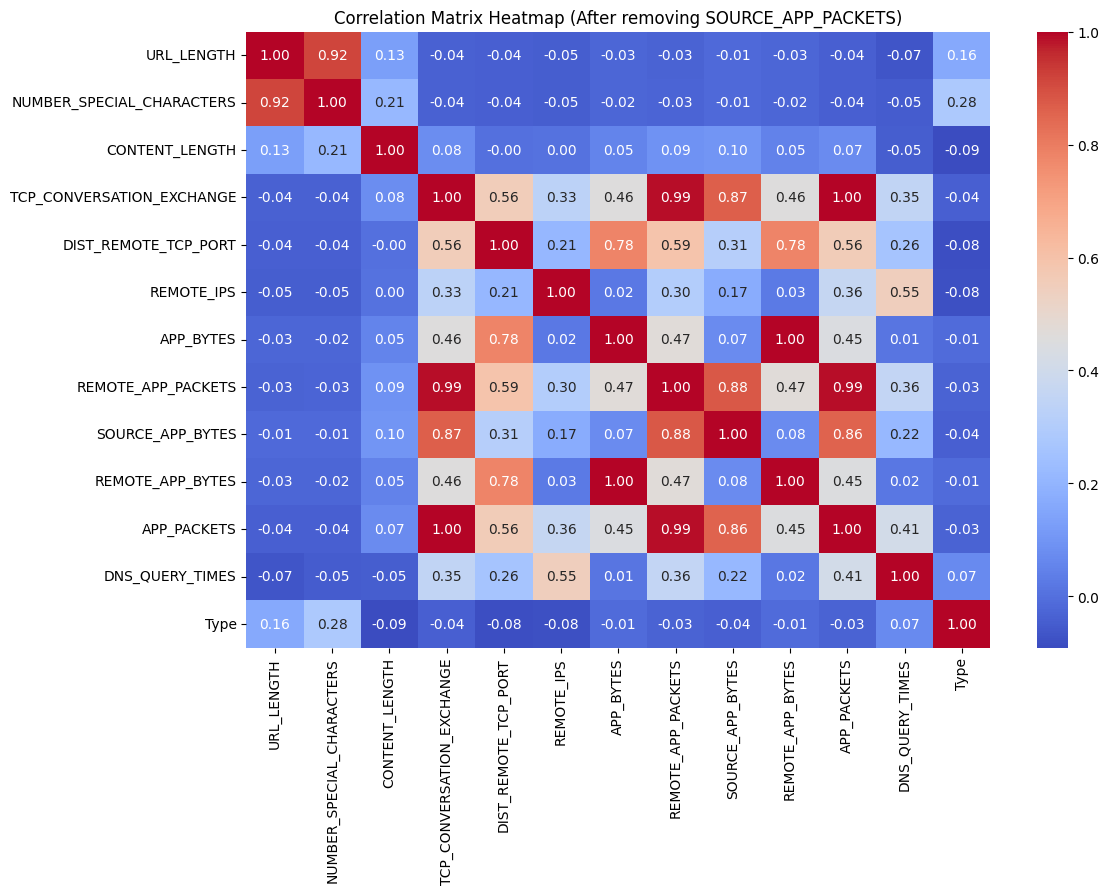

In [10]:
# Remove the SOURCE_APP_PACKETS column
websites_cleaned = websites.drop(columns=['SOURCE_APP_PACKETS'])

# Identify non-numeric columns
non_numeric_columns = websites_cleaned.select_dtypes(exclude=['int64', 'float64']).columns

# Drop non-numeric columns
websites_cleaned = websites_cleaned.drop(columns=non_numeric_columns)

# Calculate the correlation matrix for the cleaned dataset
correlation_matrix_cleaned = websites_cleaned.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap (After removing SOURCE_APP_PACKETS)')
plt.show()

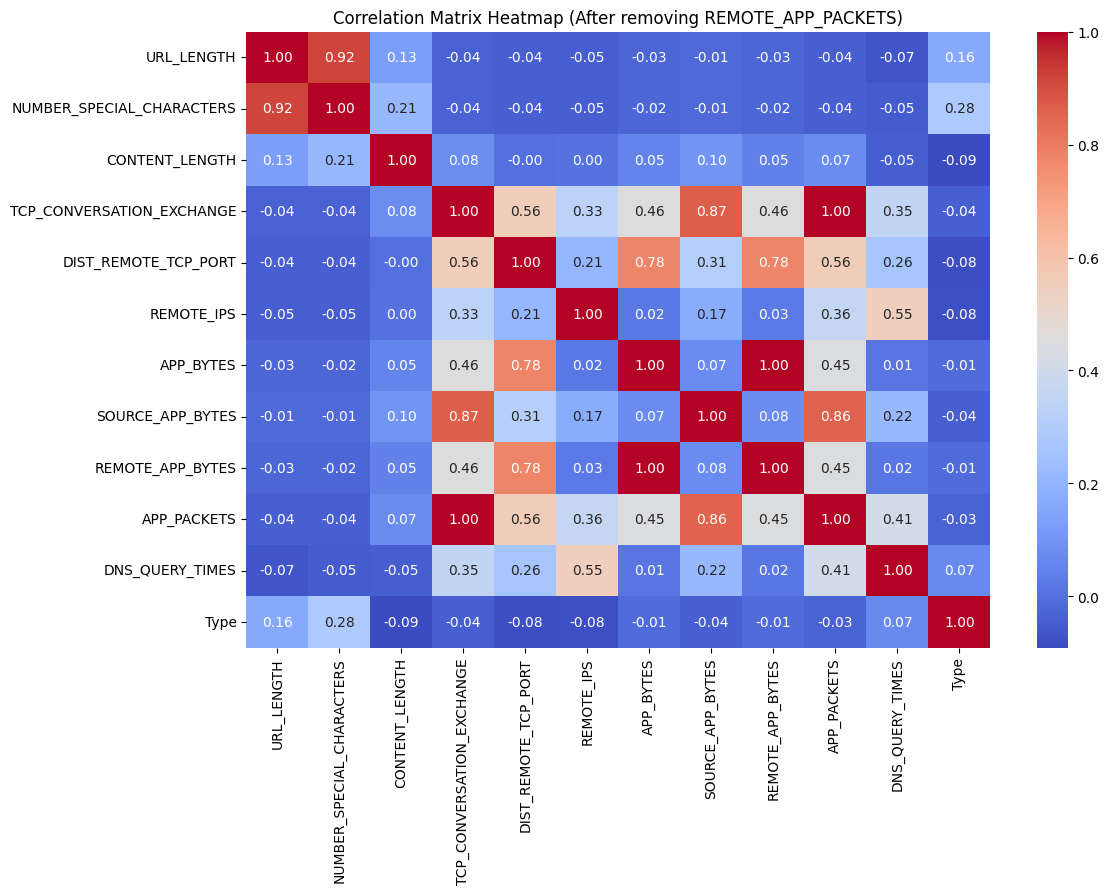

In [11]:
# Remove the column REMOTE_APP_PACKETS
websites_cleaned = websites_cleaned.drop(columns=['REMOTE_APP_PACKETS'])

# Calculate the correlation matrix for the cleaned dataset
correlation_matrix_cleaned = websites_cleaned.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap (After removing REMOTE_APP_PACKETS)')
plt.show()

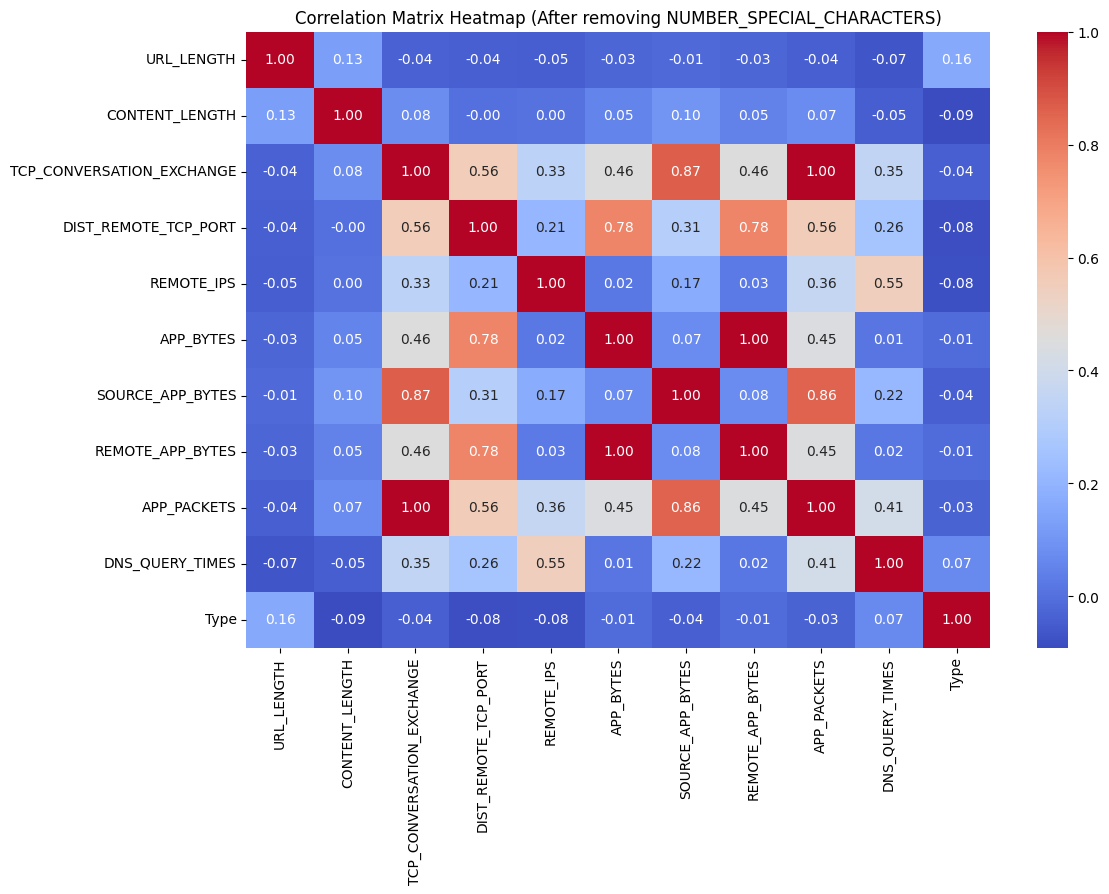

In [12]:
websites_cleaned = websites_cleaned.drop(columns=['NUMBER_SPECIAL_CHARACTERS'])

# Calculate the correlation matrix for the cleaned dataset
correlation_matrix_cleaned = websites_cleaned.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap (After removing NUMBER_SPECIAL_CHARACTERS)')
plt.show()

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [13]:
# Your code here
# Check for missing values in each column
missing_values = websites.isnull().sum()

# Display the number of missing values in each column
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64


If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [14]:
# Calculate the proportion of missing values for each column
missing_proportion = missing_values / len(websites)

# Identify columns to drop based on the threshold of 30% missing values
columns_to_drop = missing_proportion[missing_proportion > 0.3].index

# Drop the identified columns
websites_cleaned = websites.drop(columns=columns_to_drop)

# Comment on the columns that are dropped
dropped_columns_comment = f"Dropped columns due to a high proportion of missing values: {', '.join(columns_to_drop)}."

# Drop rows with any remaining missing values
websites_cleaned = websites_cleaned.dropna()

dropped_columns_comment, websites_cleaned.isnull().sum()

('Dropped columns due to a high proportion of missing values: CONTENT_LENGTH.',
 URL                          0
 URL_LENGTH                   0
 NUMBER_SPECIAL_CHARACTERS    0
 CHARSET                      0
 SERVER                       0
 WHOIS_COUNTRY                0
 WHOIS_STATEPRO               0
 WHOIS_REGDATE                0
 WHOIS_UPDATED_DATE           0
 TCP_CONVERSATION_EXCHANGE    0
 DIST_REMOTE_TCP_PORT         0
 REMOTE_IPS                   0
 APP_BYTES                    0
 SOURCE_APP_PACKETS           0
 REMOTE_APP_PACKETS           0
 SOURCE_APP_BYTES             0
 REMOTE_APP_BYTES             0
 APP_PACKETS                  0
 DNS_QUERY_TIMES              0
 Type                         0
 dtype: int64)

In [15]:
# Your comment here

# This code calculates the proportion of missing values for each column, identifies columns with a missing value proportion exceeding 30%, drops those columns,
#  and then drops any rows with remaining missing values. 

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [16]:
# Examine missing values in each column
# Check for missing values in each column
missing_values = websites_cleaned.isnull().sum()

# Display the number of missing values in each column
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64


# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [17]:
# Your code here
# Convert all country names to uppercase
websites_cleaned['WHOIS_COUNTRY'] = websites_cleaned['WHOIS_COUNTRY'].str.upper()

# Replace inconsistent country names with appropriate country codes
websites_cleaned['WHOIS_COUNTRY'].replace({
    'CYPRUS': 'CY',
    'UNITED KINGDOM': 'GB',
    "[U'GB'; U'UK']": 'GB',
    'UK': 'GB',
    'US': 'US',
    'SE': 'SE'
}, inplace=True)

# List out the unique values of the WHOIS_COUNTRY column again
unique_countries = websites_cleaned['WHOIS_COUNTRY'].unique()
print("Unique values of WHOIS_COUNTRY after consolidation:")
print(unique_countries)




Unique values of WHOIS_COUNTRY after consolidation:
['US' 'SC' 'RU' 'AU' 'CA' 'PA' 'IN' 'GB' 'NL' 'UG' 'JP' 'CN' 'SI' 'KY'
 'AT' 'CZ' 'PH' 'LV' 'TR' 'ES' 'HK' 'UA' 'CH' 'BS' 'PK' 'IL' 'DE' 'SE'
 'IT' 'NO' 'BE' 'BY' 'AE' 'IE' 'UY' 'KG']


C:\Users\diana\AppData\Local\Temp\ipykernel_45136\1943311882.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  websites_cleaned['WHOIS_COUNTRY'].replace({


Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

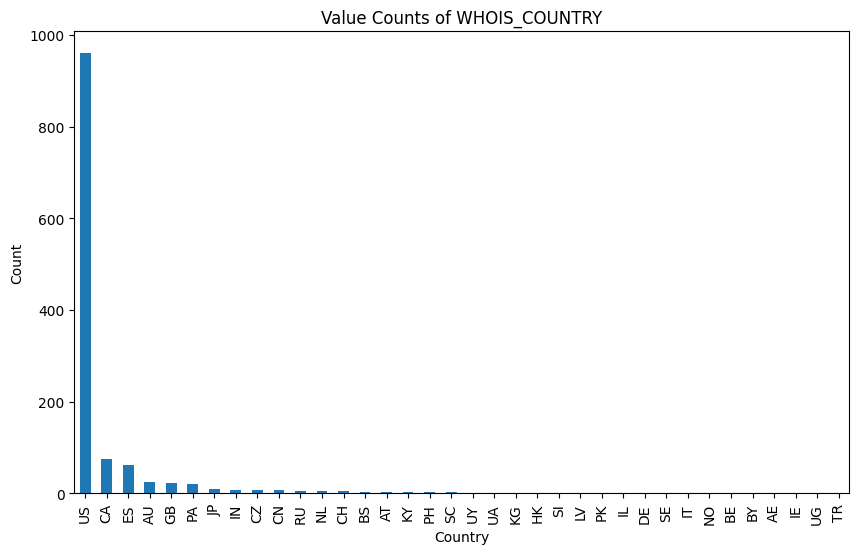

In [18]:
# Your code here

# Plot a bar chart of the value counts of WHOIS_COUNTRY
plt.figure(figsize=(10, 6))
websites_cleaned['WHOIS_COUNTRY'].value_counts().plot(kind='bar')
plt.title('Value Counts of WHOIS_COUNTRY')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [19]:
# Get the top 10 most frequent values
top_countries = websites_cleaned['WHOIS_COUNTRY'].value_counts().head(10).index

# Replace values not in the top 10 with 'OTHER'
websites_cleaned['WHOIS_COUNTRY'] = websites_cleaned['WHOIS_COUNTRY'].apply(lambda x: x if x in top_countries else 'OTHER')

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [20]:
# Drop the specified columns
websites_cleaned.drop(columns=['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], inplace=True)

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [21]:
# Your code here

print(websites_cleaned[['URL', 'CHARSET', 'SERVER']].dtypes)


URL        object
CHARSET    object
SERVER     object
dtype: object


#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [22]:
# Your code here
websites_cleaned.drop(columns=['URL'], inplace=True)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [23]:
# Your code here
print(websites_cleaned['CHARSET'].value_counts())

CHARSET
UTF-8           520
utf-8           279
ISO-8859-1      275
us-ascii         98
iso-8859-1       83
windows-1251      1
windows-1252      1
Name: count, dtype: int64


`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [29]:
# Your code here
# Print the unique values of SERVER
print(websites_cleaned['SERVER'].unique())


['nginx' 'Apache' 'Microsoft' 'Other']


![Think Hard](../images/think-hard.jpg)

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [34]:
# Define a function to re-label SERVER values
def label_server(server):
    if 'Microsoft' in server:
        return 'Microsoft'
    elif 'Apache' in server:
        return 'Apache'
    elif 'nginx' in server:
        return 'nginx'
    else:
        return 'Other'

# Apply the function to re-label SERVER values
websites_cleaned['SERVER'] = websites_cleaned['SERVER'].apply(label_server)

In [38]:
# Count `SERVER` value counts here
# Count the value counts of SERVER column
server_counts = websites_cleaned['SERVER'].value_counts()
print(server_counts)

SERVER
Apache       491
nginx        322
Other        300
Microsoft    144
Name: count, dtype: int64


OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Also, assign the data with dummy values to a new variable `website_dummy`.**

In [42]:
websites_cleaned.columns

Index(['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'WHOIS_COUNTRY', 'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT',
       'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS',
       'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS',
       'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [44]:
# Your code here
# Convert categorical columns to ordinal data using get_dummies
website_dummy = pd.get_dummies(websites_cleaned, drop_first=True)

website_dummy.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,...,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_CZ,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_GB,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_US
3,17,6,31,22,3,3812,39,37,18784,4380,...,False,False,False,False,False,False,False,False,False,True
5,18,7,11,6,9,894,11,13,838,894,...,False,False,False,False,False,False,False,True,False,False
6,18,6,12,0,3,1189,14,13,8559,1327,...,False,False,False,False,False,False,False,False,False,True
7,19,6,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
10,20,6,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [46]:
# Your code here
# Inspecting the data types and sample rows of website_dummy
data_types_dummy = website_dummy.dtypes
sample_data_dummy = website_dummy.head()

data_types_dummy, sample_data_dummy

(URL_LENGTH                     int64
 NUMBER_SPECIAL_CHARACTERS      int64
 TCP_CONVERSATION_EXCHANGE      int64
 DIST_REMOTE_TCP_PORT           int64
 REMOTE_IPS                     int64
 APP_BYTES                      int64
 SOURCE_APP_PACKETS             int64
 REMOTE_APP_PACKETS             int64
 SOURCE_APP_BYTES               int64
 REMOTE_APP_BYTES               int64
 APP_PACKETS                    int64
 DNS_QUERY_TIMES              float64
 Type                           int64
 CHARSET_UTF-8                   bool
 CHARSET_iso-8859-1              bool
 CHARSET_us-ascii                bool
 CHARSET_utf-8                   bool
 CHARSET_windows-1251            bool
 CHARSET_windows-1252            bool
 SERVER_Microsoft                bool
 SERVER_Other                    bool
 SERVER_nginx                    bool
 WHOIS_COUNTRY_CA                bool
 WHOIS_COUNTRY_CN                bool
 WHOIS_COUNTRY_CZ                bool
 WHOIS_COUNTRY_ES                bool
 WHOIS_COUNT

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [57]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target (y)
X = website_dummy.drop('Type', axis=1)
y = website_dummy['Type']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Check the shapes of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1005, 31), (252, 31), (1005,), (252,))

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [67]:
# Your code here:
# Importing LogisticRegression from scikit-learn and initializing the model
from sklearn.linear_model import LogisticRegression

# Initializing the Logistic Regression model with an increased max_iter value
log_reg = LogisticRegression(max_iter=1000)

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [76]:
# Your code here:
# Fitting the logistic regression model to the training data
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [84]:
# Your code here:
from sklearn.metrics import confusion_matrix, accuracy_score

# Using the model to predict on the test data
y_pred = log_reg.predict(X_test)

# Printing the confusion matrix and accuracy score
conf_matrix = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)

conf_matrix, acc_score


(array([[224,   0],
        [ 14,  14]], dtype=int64),
 0.9444444444444444)

What are your thoughts on the performance of the model? Write your conclusions below.

In [85]:
# Your conclusions here:



#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [86]:
# Your code here:



To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [87]:
# Your code here:



#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [88]:
# Your code here:



Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [89]:
# Your conclusions here:



# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [90]:
# Your code here